# Deterministic Optimism: When Models Assume Best-Case Conditions

This notebook demonstrates a dangerous risk: **deterministic optimism** - assuming best-case parameter values leads to recommendations that work in theory but fail in practice.

Understanding this is critical because:
- Models with optimistic assumptions produce recommendations that work if everything goes perfectly
- But reality is messier: things go wrong, efficiency varies, delays occur
- Using realistic parameters produces more robust recommendations
- Optimal (theoretical) is not the same as achievable (practical)


## Key Concepts

**Deterministic Optimism**:
- Assuming best-case parameter values
- Using minimum times, maximum efficiency, perfect conditions
- Models assume everything will work perfectly

**The Problem**:
- Reality is messier than models assume
- Things go wrong: delays, breakdowns, variation
- Models with optimistic assumptions fail in practice
- Recommendations work in theory but not in reality

**Optimal vs Achievable**:
- **Optimal**: Best solution given model assumptions (might be optimistic)
- **Achievable**: Solution that works in practice (requires realistic assumptions)
- A recommendation can be mathematically optimal but practically unachievable

**Critical insight**: Use realistic parameters, not best-case. Test what happens if things go wrong.


## Scenario: Production Scheduling Decision

You manage a factory and must schedule production. Processing times vary:
- **Observed times**: 8, 9, 10, 11, 12 minutes (average = 10 minutes)
- **Best case**: 8 minutes (minimum observed)
- **Worst case**: 12 minutes (maximum observed)

**The model can use:**
- **Optimistic**: 8 minutes (best-case, assumes perfect conditions)
- **Realistic**: 10 minutes (average, typical conditions)
- **Pessimistic**: 12 minutes (worst-case, accounts for problems)

**Question**: Which produces recommendations that work in practice?


## Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Step 2: Observed Processing Times

Let's look at the actual processing times observed:


OBSERVED PROCESSING TIMES:
  Data: [8, 9, 10, 11, 12] minutes
  Minimum (best case): 8 minutes
  Maximum (worst case): 12 minutes
  Average (typical): 10.0 minutes


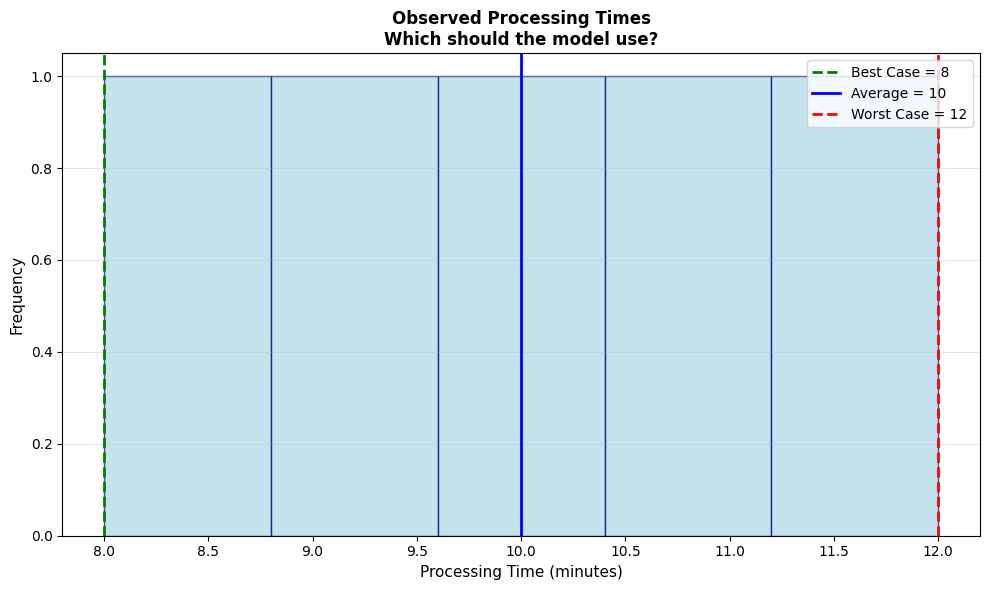


KEY QUESTION:
  Which parameter should the model use?
  - Best case (8 min)? Optimistic - assumes perfect conditions
  - Average (10 min)? Realistic - typical conditions
  - Worst case (12 min)? Pessimistic - accounts for problems


In [2]:
# Observed processing times (minutes)
observed_times = [8, 9, 10, 11, 12]
min_time = min(observed_times)
max_time = max(observed_times)
avg_time = np.mean(observed_times)

print("OBSERVED PROCESSING TIMES:")
print(f"  Data: {observed_times} minutes")
print(f"  Minimum (best case): {min_time} minutes")
print(f"  Maximum (worst case): {max_time} minutes")
print(f"  Average (typical): {avg_time:.1f} minutes")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(observed_times, bins=5, color='lightblue', edgecolor='navy', alpha=0.7)
ax.axvline(x=min_time, color='green', linestyle='--', linewidth=2, label=f'Best Case = {min_time}')
ax.axvline(x=avg_time, color='blue', linestyle='-', linewidth=2, label=f'Average = {avg_time:.0f}')
ax.axvline(x=max_time, color='red', linestyle='--', linewidth=2, label=f'Worst Case = {max_time}')
ax.set_xlabel('Processing Time (minutes)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title('Observed Processing Times\nWhich should the model use?', 
             fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nKEY QUESTION:")
print("  Which parameter should the model use?")
print("  - Best case (8 min)? Optimistic - assumes perfect conditions")
print("  - Average (10 min)? Realistic - typical conditions")
print("  - Worst case (12 min)? Pessimistic - accounts for problems")


## Step 3: Model with Optimistic Parameters

Let's see what happens when the model uses optimistic (best-case) parameters:


OPTIMISTIC MODEL (Uses Best-Case Parameter):
  Processing time parameter: 8 minutes (best case)
  Assumption: Every unit takes exactly 8 minutes
  Total time needed: 800 minutes (13.3 hours)

⚠️  WARNING: This assumes perfect conditions - no delays, no problems!

WHAT ACTUALLY HAPPENS:
  Actual total time: 1007 minutes (16.8 hours)
  Time overrun: 207 minutes (25.9% over)
  ⚠️  PROBLEM: Schedule fails! Takes longer than planned!


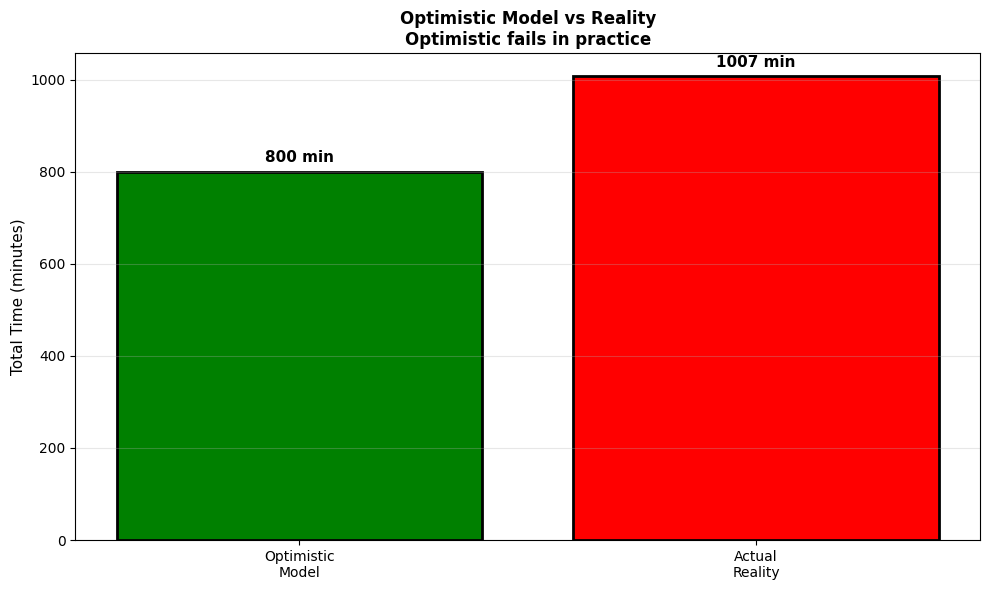

In [3]:
# Scenario: Need to produce 100 units
units_needed = 100

# OPTIMISTIC MODEL: Uses best-case parameter
processing_time_optimistic = min_time  # 8 minutes (best case)
total_time_optimistic = units_needed * processing_time_optimistic
hours_optimistic = total_time_optimistic / 60

print("OPTIMISTIC MODEL (Uses Best-Case Parameter):")
print(f"  Processing time parameter: {processing_time_optimistic} minutes (best case)")
print(f"  Assumption: Every unit takes exactly {processing_time_optimistic} minutes")
print(f"  Total time needed: {total_time_optimistic} minutes ({hours_optimistic:.1f} hours)")
print(f"\n⚠️  WARNING: This assumes perfect conditions - no delays, no problems!")

# What happens in reality?
# Actual times vary: some 8 min, some 10 min, some 12 min
# Let's simulate what actually happens
np.random.seed(42)
actual_times = np.random.choice(observed_times, size=units_needed)
total_actual_time = np.sum(actual_times)
hours_actual = total_actual_time / 60

time_overrun = total_actual_time - total_time_optimistic
overrun_pct = (time_overrun / total_time_optimistic) * 100

print(f"\nWHAT ACTUALLY HAPPENS:")
print(f"  Actual total time: {total_actual_time} minutes ({hours_actual:.1f} hours)")
print(f"  Time overrun: {time_overrun} minutes ({overrun_pct:.1f}% over)")
print(f"  ⚠️  PROBLEM: Schedule fails! Takes longer than planned!")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
scenarios = ['Optimistic\nModel', 'Actual\nReality']
times = [total_time_optimistic, total_actual_time]
colors = ['green', 'red']

bars = ax.bar(scenarios, times, color=colors, edgecolor='black', linewidth=2)
ax.set_ylabel('Total Time (minutes)', fontsize=11)
ax.set_title('Optimistic Model vs Reality\nOptimistic fails in practice', 
             fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bar, time in zip(bars, times):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
            f'{time:.0f} min', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


REALISTIC MODEL (Uses Average Parameter):
  Processing time parameter: 10.0 minutes (average)
  Assumption: Typical conditions, some variation expected
  Total time needed: 1000 minutes (16.7 hours)

COMPARED TO ACTUAL:
  Actual total time: 1007 minutes
  Difference: +7 minutes (+0.7%)
  ✓ REALISTIC: Close to actual, works in practice!


COMPARISON:

            Model Type Parameter  Total Time (min) Works in Practice?
Optimistic (Best Case)         8             800.0         No (fails)
   Realistic (Average)      10.0            1000.0        Yes (works)
                Actual       N/A            1007.0                N/A


/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_5628/2429267856.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_types, rotation=15, ha='right')


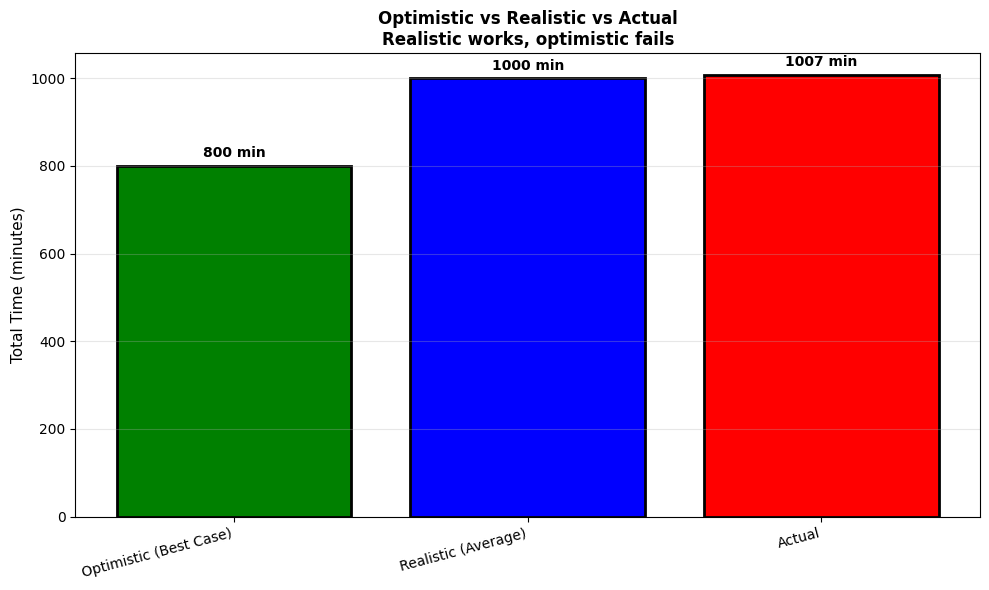

In [4]:
# REALISTIC MODEL: Uses average parameter
processing_time_realistic = avg_time  # 10 minutes (average)
total_time_realistic = units_needed * processing_time_realistic
hours_realistic = total_time_realistic / 60

print("REALISTIC MODEL (Uses Average Parameter):")
print(f"  Processing time parameter: {processing_time_realistic:.1f} minutes (average)")
print(f"  Assumption: Typical conditions, some variation expected")
print(f"  Total time needed: {total_time_realistic:.0f} minutes ({hours_realistic:.1f} hours)")

# Compare to actual
time_difference_realistic = total_actual_time - total_time_realistic
difference_pct = (time_difference_realistic / total_time_realistic) * 100

print(f"\nCOMPARED TO ACTUAL:")
print(f"  Actual total time: {total_actual_time} minutes")
print(f"  Difference: {time_difference_realistic:+.0f} minutes ({difference_pct:+.1f}%)")
print(f"  ✓ REALISTIC: Close to actual, works in practice!")

# Compare all three
comparison = pd.DataFrame({
    'Model Type': ['Optimistic (Best Case)', 'Realistic (Average)', 'Actual'],
    'Parameter': [min_time, avg_time, 'N/A'],
    'Total Time (min)': [total_time_optimistic, total_time_realistic, total_actual_time],
    'Works in Practice?': ['No (fails)', 'Yes (works)', 'N/A']
})

print("\n\nCOMPARISON:\n")
print(comparison.to_string(index=False))

# Visualize comparison
fig, ax = plt.subplots(figsize=(10, 6))
model_types = comparison['Model Type']
times_comp = comparison['Total Time (min)']
colors_comp = ['green', 'blue', 'red']

bars = ax.bar(model_types, times_comp, color=colors_comp, edgecolor='black', linewidth=2)
ax.set_ylabel('Total Time (minutes)', fontsize=11)
ax.set_title('Optimistic vs Realistic vs Actual\nRealistic works, optimistic fails', 
             fontsize=12, fontweight='bold')
ax.set_xticklabels(model_types, rotation=15, ha='right')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bar, time in zip(bars, times_comp):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
            f'{time:.0f} min', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


## Step 5: Optimal vs Achievable

Let's understand the difference between optimal (theoretical) and achievable (practical):


OPTIMAL vs ACHIEVABLE:

OPTIMAL (Theoretical):
  - Uses best-case parameters (8 minutes)
  - Assumes perfect conditions
  - Mathematically optimal solution
  - Total time: 800 minutes
  - ⚠️  But: Fails in practice (takes 1007 minutes)

ACHIEVABLE (Practical):
  - Uses realistic parameters (10 minutes)
  - Accounts for typical conditions
  - Works in practice
  - Total time: 1000 minutes
  - ✓ Close to actual (1007 minutes)


KEY INSIGHT:
  Optimal ≠ Achievable
  - Optimal assumes perfect conditions (optimistic)
  - Achievable requires realistic conditions
  - Always ask: Is this optimal or achievable?


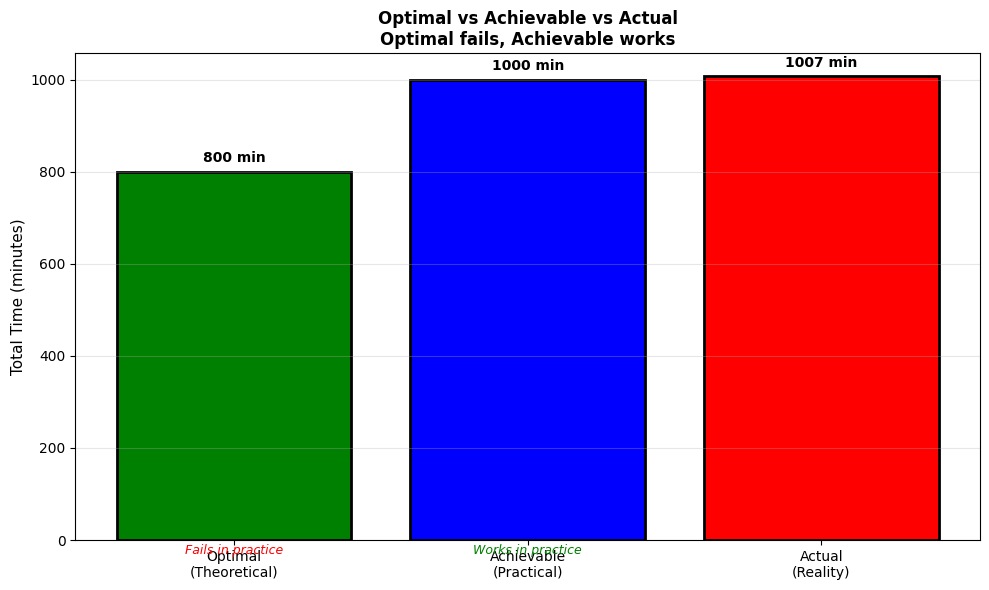

In [5]:
print("OPTIMAL vs ACHIEVABLE:\n")

print("OPTIMAL (Theoretical):")
print(f"  - Uses best-case parameters (8 minutes)")
print(f"  - Assumes perfect conditions")
print(f"  - Mathematically optimal solution")
print(f"  - Total time: {total_time_optimistic} minutes")
print(f"  - ⚠️  But: Fails in practice (takes {total_actual_time} minutes)")

print("\nACHIEVABLE (Practical):")
print(f"  - Uses realistic parameters (10 minutes)")
print(f"  - Accounts for typical conditions")
print(f"  - Works in practice")
print(f"  - Total time: {total_time_realistic:.0f} minutes")
print(f"  - ✓ Close to actual ({total_actual_time} minutes)")

print("\n\nKEY INSIGHT:")
print("  Optimal ≠ Achievable")
print("  - Optimal assumes perfect conditions (optimistic)")
print("  - Achievable requires realistic conditions")
print("  - Always ask: Is this optimal or achievable?")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
concepts = ['Optimal\n(Theoretical)', 'Achievable\n(Practical)', 'Actual\n(Reality)']
times_concept = [total_time_optimistic, total_time_realistic, total_actual_time]
colors_concept = ['green', 'blue', 'red']

bars = ax.bar(concepts, times_concept, color=colors_concept, edgecolor='black', linewidth=2)
ax.set_ylabel('Total Time (minutes)', fontsize=11)
ax.set_title('Optimal vs Achievable vs Actual\nOptimal fails, Achievable works', 
             fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add value labels and status
for i, (bar, time, concept) in enumerate(zip(bars, times_concept, concepts)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
            f'{time:.0f} min', ha='center', fontsize=10, fontweight='bold')
    if i == 0:
        ax.text(bar.get_x() + bar.get_width()/2, -30,
                'Fails in practice', ha='center', fontsize=9, style='italic', color='red')
    elif i == 1:
        ax.text(bar.get_x() + bar.get_width()/2, -30,
                'Works in practice', ha='center', fontsize=9, style='italic', color='green')

plt.tight_layout()
plt.show()


## Summary: Deterministic Optimism

**Key Takeaways:**

1. **Deterministic optimism leads to failures**
   - Using best-case parameters assumes perfect conditions
   - Reality is messier: delays, variation, problems occur
   - Optimistic models work in theory but fail in practice

2. **Use realistic parameters**
   - Not best-case, not worst-case, but typical
   - Accounts for normal variation and typical problems
   - Produces recommendations that work in practice

3. **Optimal ≠ Achievable**
   - **Optimal**: Best solution given model assumptions (might be optimistic)
   - **Achievable**: Solution that works in practice (requires realistic assumptions)
   - A recommendation can be mathematically optimal but practically unachievable

4. **Practical implications**
   - Use realistic parameters, not optimistic ones
   - Test what happens if conditions are not perfect
   - Build robustness into recommendations
   - Ask: Is this optimal or achievable?

**Remember**: Models should work in typical conditions, not just perfect conditions. Use realistic parameters!
